<a href="https://colab.research.google.com/github/priti15ghugal/Heart_attak_dataset_notebook/blob/main/root2ai_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem** **statment**: ***The dataset contain two columns (Text and Target) ***
                  ***To predict which Text is belong to which Target***

# Import all the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import nltk
import re

nltk.download("stopwords")
from nltk.corpus import stopwords
Stop = stopwords.words("english")

from sklearn.metrics import accuracy_score,fbeta_score,classification_report

from nltk.tokenize import word_tokenize



nltk.download('wordnet')
nltk.download('punkt')





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load the dataset**

In [ ]:
data = pd.read_csv('/root2ai - Data.csv')

In [ ]:
data

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain
...,...,...
22699,fourth study discusses blockchain technology e...,Reg Tech
22700,book finishes stating biggest issue emerging F...,Reg Tech
22701,people culture cess,Reg Tech
22702,author challenges execu tive lead change stop ...,Reg Tech


**Check shape of dataset**

In [ ]:
data.shape

(22704, 2)

**get information about data**

In [ ]:
data.info

<bound method DataFrame.info of                                                     Text      Target
0      reserve bank forming expert committee based in...  Blockchain
1              director could play role financial system  Blockchain
2      preliminary discuss secure transaction study r...  Blockchain
3      security indeed prove essential transforming f...  Blockchain
4      bank settlement normally take three days based...  Blockchain
...                                                  ...         ...
22699  fourth study discusses blockchain technology e...    Reg Tech
22700  book finishes stating biggest issue emerging F...    Reg Tech
22701                                people culture cess    Reg Tech
22702  author challenges execu tive lead change stop ...    Reg Tech
22703  change data driven culture come bottom must start    Reg Tech

[22704 rows x 2 columns]>

In [ ]:
data.describe()

,Text,Target
count,22701,22704
unique,20986,11
top,billion,FinTech
freq,41,8551


**thir is mismatch in Text count and Target counts shows may be null values in Text column **

>





**check null values**

In [ ]:
data.isnull().sum()

Text      3
Target    0
dtype: int64

**we have 3 null values in text column**

In [ ]:
data.notnull().head()

,Text,Target
0,True,True
1,True,True
2,True,True
3,True,True
4,True,True


**drop null values**

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Text      0
Target    0
dtype: int64

**removed null values**

In [ ]:
data.head()

,Text,Target
0,reserve bank forming expert committee based in...,Blockchain
1,director could play role financial system,Blockchain
2,preliminary discuss secure transaction study r...,Blockchain
3,security indeed prove essential transforming f...,Blockchain
4,bank settlement normally take three days based...,Blockchain


In [ ]:
data.shape

(22701, 2)

**after droping null values data shape is changed**

**check how many values are present in Target column**

In [ ]:
data['Target'].value_counts()

FinTech             8551
Cyber Security      2640
Bigdata             2267
Reg Tech            2206
credit reporting    1748
Blockchain          1375
Neobanks            1069
Microservices        974
Stock Trading        787
Robo Advising        737
Data Security        347
Name: Target, dtype: int64

**thier are 11 unique values in target column**

**convert Target column into numeric**... 

In [ ]:
col = ['Text',"Target"]
data = data[col]
data = data[pd.notnull(data['Text'])]

In [ ]:
data.columns = ['Text','Target']
data['category_id']= data['Target'].factorize()[0]
cat_id_data = data[['Target','category_id']].drop_duplicates().sort_values('category_id')
cat_to_id= dict(cat_id_data.values)
id_to_cat = dict(cat_id_data[['category_id','Target']].values)
data.head()

,Text,Target,category_id
0,reserve bank forming expert committee based in...,Blockchain,0
1,director could play role financial system,Blockchain,0
2,preliminary discuss secure transaction study r...,Blockchain,0
3,security indeed prove essential transforming f...,Blockchain,0
4,bank settlement normally take three days based...,Blockchain,0


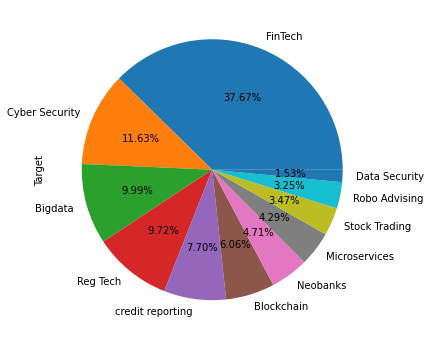

In [ ]:
data['Target'].value_counts().plot(kind = 'pie',figsize = (6,6),autopct = "%1.2f%%")

plt.show()

**this shows that more text from Fintech as compare to others**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding ='latin-1')

**tfidf is transform text into a meaningfull  representation of number**

In [ ]:
features = vec.fit_transform(data.Text).toarray()

print(features.shape)

(22701, 11409)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
x = cv.fit_transform(data['Text'])
print(x.shape)

(22701, 11409)


**countvectorizer give number of frequency with respect to index of vocabulary**

In [ ]:
cv = CountVectorizer()
x = cv.fit(data['Text'])
x.vocabulary_
x.get_feature_names()

['abaker',
 'abandon',
 'abandoned',
 'abandonment',
 'abashed',
 'abbeel',
 'abcs',
 'abductive',
 'abdullah',
 'abhijit',
 'abid',
 'abide',
 'abiding',
 'abilities',
 'ability',
 'able',
 'abnormal',
 'abnormalities',
 'aboard',
 'abolition',
 'abound',
 'about',
 'above',
 'abreast',
 'abroad',
 'absence',
 'abside',
 'absolute',
 'absolutely',
 'absorb',
 'absorbing',
 'abstract',
 'abstracted',
 'abstraction',
 'absurd',
 'absurdity',
 'abundance',
 'abundant',
 'abundantly',
 'abuse',
 'abusive',
 'abysmally',
 'academia',
 'academic',
 'academics',
 'academy',
 'acceler',
 'accelerate',
 'accelerated',
 'accelerating',
 'acceleration',
 'accelerator',
 'accentuated',
 'accenture',
 'accep',
 'accept',
 'acceptability',
 'acceptable',
 'acceptance',
 'accepted',
 'access',
 'accessed',
 'accesses',
 'accessibility',
 'accessible',
 'accessing',
 'accidental',
 'acclaim',
 'accommodate',
 'accommodation',
 'accommodative',
 'accompany',
 'accomplish',
 'accomplished',
 'accord',


In [ ]:
x = cv.fit_transform(data['Text']).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df = pd.DataFrame(x,columns = cv.get_feature_names())
df


,abaker,abandon,abandoned,abandonment,abashed,abbeel,abcs,abductive,abdullah,abhijit,abid,abide,abiding,abilities,ability,able,abnormal,abnormalities,aboard,abolition,abound,about,above,abreast,abroad,absence,abside,absolute,absolutely,absorb,absorbing,abstract,abstracted,abstraction,absurd,absurdity,abundance,abundant,abundantly,abuse,...,year,yearly,years,yesterday,yfjza,yield,ying,yogi,yojana,yonder,york,young,younger,your,yourself,youth,youthful,youtube,yuan,zaharia,zaleski,zambia,zambian,zation,zenefits,zero,zeros,zettabytes,zetzsche,zhangxi,zhou,zine,zing,zipss,zmlg,zone,zoom,zrev,zurich,zxnglqu
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22698,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
22699,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**now we have different values for every single word**

In [ ]:
y = data['category_id']
y

0         0
1         0
2         0
3         0
4         0
         ..
22699    10
22700    10
22701    10
22702    10
22703    10
Name: category_id, Length: 22701, dtype: int64

**seperate the target column**

**split the  dataset into train and test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df,y,test_size = 0.20,random_state =0)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(18160, 11409) (4541, 11409) (18160,) (4541,)


**apply algo**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB().fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.6604272186743008


In [ ]:
print(classification_report(y_test,y_pred,target_names =data['Target'].unique()))

                  precision    recall  f1-score   support

      Blockchain       0.78      0.40      0.53       286
         Bigdata       0.85      0.70      0.77       451
credit reporting       0.73      0.53      0.61       332
  Cyber Security       0.65      0.54      0.59       540
         FinTech       0.58      0.92      0.71      1712
   Microservices       0.79      0.46      0.58       186
        Neobanks       0.66      0.13      0.22       202
   Robo Advising       0.65      0.09      0.17       137
   Stock Trading       0.81      0.39      0.53       175
   Data Security       0.00      0.00      0.00        78
        Reg Tech       0.86      0.76      0.81       442

        accuracy                           0.66      4541
       macro avg       0.67      0.45      0.50      4541
    weighted avg       0.68      0.66      0.63      4541



In [ ]:
df_check = pd.DataFrame({"actual":y_test,"predicted":y_pred})

In [ ]:
df_check

,actual,predicted
4969,2,4
5984,3,3
21827,10,10
3372,1,1
9009,4,4
...,...,...
12880,4,4
17740,6,4
10647,4,4
5190,2,3


*1* -- ***The dataset is imbalanced biased toward Fintech***

*2* --*** Accuracy is getting 66% using MultinomialNB algo***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf =RandomForestClassifier(n_estimators = 100)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction = rf.predict(X_test)

In [ ]:
print(accuracy_score(y_test,prediction))

0.6256331204580489


**getting 62% accuracy with random Forest**